# Домашнее задание №9. Регуляризация

## Задание 1
Для выбранного в прошлом задании датасета и выбранных в нем признаков постройте множественную линейную регрессию с регуляризацией Ridge (самостоятельно написанную или, например, <code>sklearn.linear_model.Ridge</code>).

Подбор параметров осуществляйте самостоятельно, либо используя встроенные средства, например, <code>sklearn.model_selection.GridSearchCV</code>.

Для оценки результатов выберите какую-нибудь метрику, например, MSE, и отслеживайте как она меняется для модели без регуляризации и с ней.

In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

for_train = pd.read_csv("Student_Performance.csv")
for_train.head()
#print(for_train.columns.tolist().pop(0))
for_train['Extracurricular Activities'] = for_train['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
for_train = for_train[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']].dropna()
X = for_train[['Hours Studied',  'Previous Scores',  'Extracurricular Activities',  'Sleep Hours', 'Sample Question Papers Practiced']]
y = for_train['Performance Index']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
alpha_values = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
ridge = GridSearchCV(Ridge(),
                     alpha_values,
                     scoring='neg_mean_squared_error',
                     cv=10)
print('Лучшее значение alpha:', ridge.fit(X,y).best_params_)

# Вывод среднего значения neg_mean_squared_error
print('Метрика качества:', ridge.fit(X,y).best_score_)

Hours Studied
Лучшее значение alpha: {'alpha': 2}
Метрика качества: -4.154013025158674


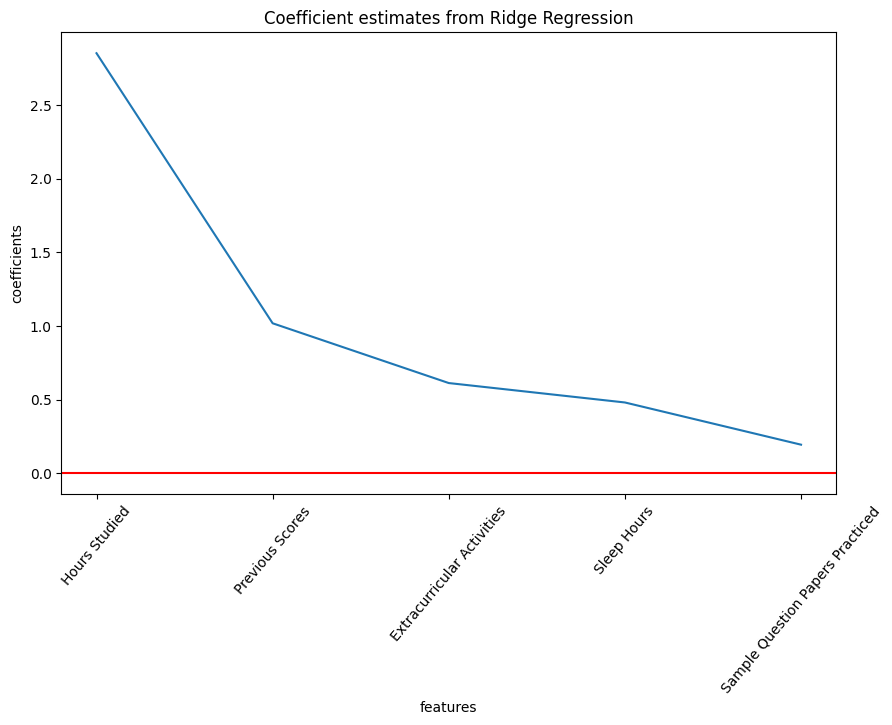

Mean Squared Error: 4.082648069390463


In [ ]:
# Напишите свой код в данной ячейке
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

for_train = pd.read_csv("Student_Performance.csv")
for_train.head()
for_train['Extracurricular Activities'] = for_train['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
for_train = for_train[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']].dropna()
X = for_train[['Hours Studied',  'Previous Scores',  'Extracurricular Activities',  'Sleep Hours', 'Sample Question Papers Practiced']]
Y = for_train['Performance Index']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
ridge = Ridge(alpha=2)
best_ridge_coeffs = ridge.fit(X, Y).coef_
feature_names = X.columns
plt.figure(figsize = (10, 6))
plt.plot(range(len(feature_names)), best_ridge_coeffs)
plt.axhline(0, color = 'r', linestyle = 'solid')
plt.xticks(range(len(feature_names)), feature_names, rotation = 50)
plt.title("Coefficient estimates from Ridge Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


## Задание 2
Тоже самое, но теперь используя регуляризацию Lasso.

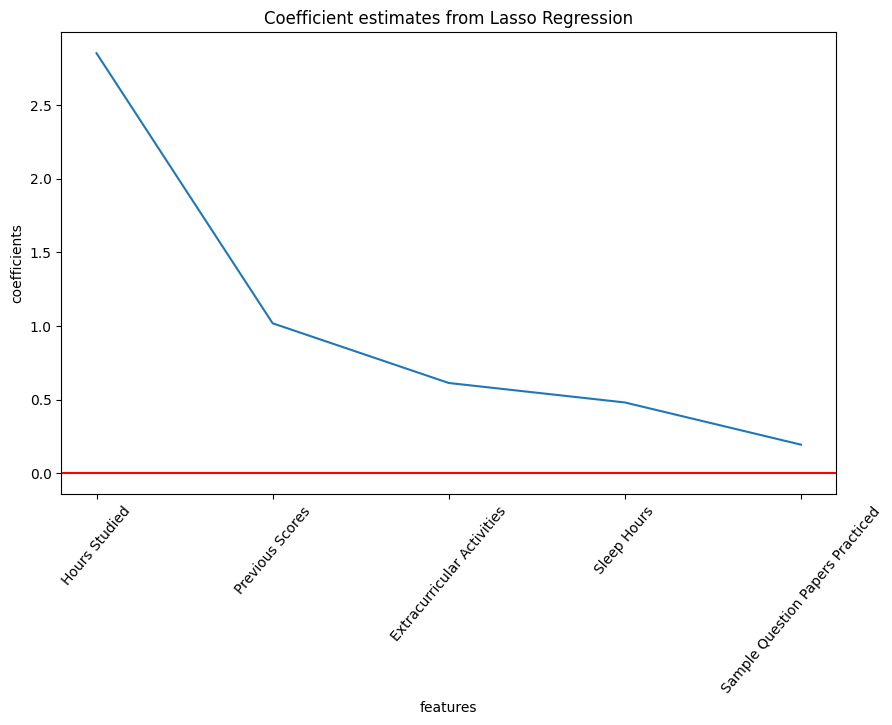

Mean Squared Error: 4.082628410911047


In [ ]:
# Напишите свой код в данной ячейке
from sklearn.linear_model import Lasso

best_lasso_model = Lasso(alpha=0.0000001)
best_lasso_coeffs = best_lasso_model.fit(X, Y).coef_
plt.figure(figsize = (10, 6))
plt.plot(range(len(feature_names)), best_lasso_coeffs)
plt.axhline(0, color = 'r', linestyle = 'solid')
plt.xticks(range(len(feature_names)), feature_names, rotation = 50)
plt.title("Coefficient estimates from Lasso Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()
best_lasso_model.fit(x_train, y_train)
y_pred = best_lasso_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Задание 3

Тоже самое, но теперь используя регуляризацию Elastic Net.

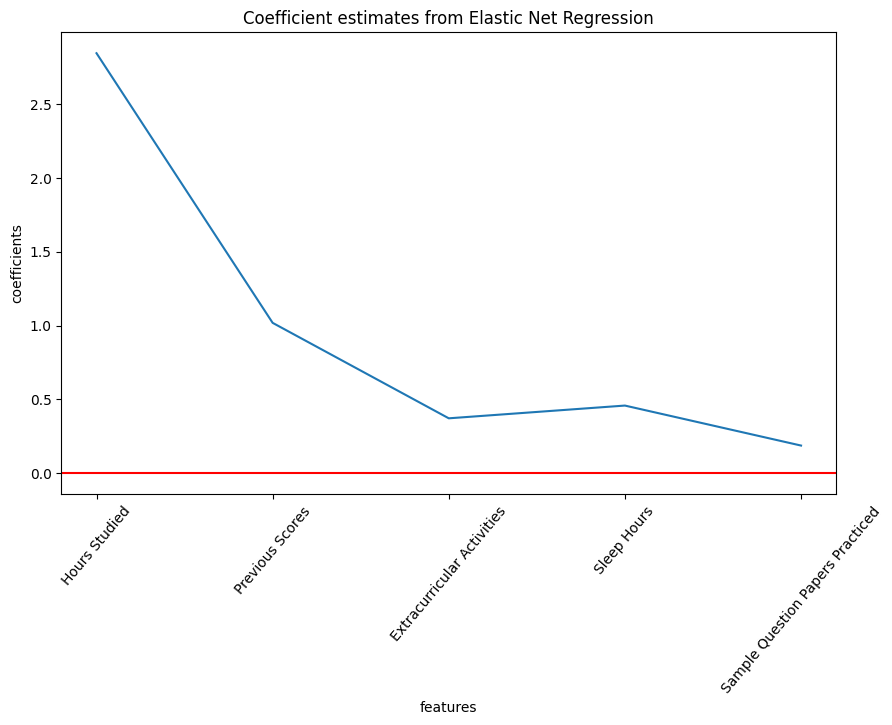

Mean Squared Error: 4.107065237223714


In [ ]:
# Напишите свой код в данной ячейке
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.06, l1_ratio=1)
best_coeffs = elastic.fit(X, Y).coef_
plt.figure(figsize = (10, 6))
plt.plot(range(len(feature_names)), best_coeffs)
plt.axhline(0, color = 'r', linestyle = 'solid')
plt.xticks(range(len(feature_names)), feature_names, rotation = 50)
plt.title("Coefficient estimates from Elastic Net Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()
elastic.fit(x_train, y_train)
y_pred = elastic.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
from sklearn.linear_model import LinearRegression
X = for_train[['Hours Studied',  'Previous Scores',  'Extracurricular Activities',  'Sleep Hours', 'Sample Question Papers Practiced']]
Y = for_train['Performance Index']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



Mean Squared Error: 4.082628398521853
